<a href="https://colab.research.google.com/github/zahriha/capstone_Xplisit/blob/main/ML/main22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'1 (1).PNG'
 1.PNG
'[2021] Bangk!t Academy Soft Skills Module 1 - Digital Branding and Interview Communication.pdf'
 22.PNG
 2.PNG
 39.PNG
 40.PNG
'41 (1).PNG'
'4 (1).PNG'
 41.PNG
 43.PNG
 46.PNG
 47.PNG
 4.PNG
 5.PNG
 6.PNG
 archive.zip
 Classroom
'Colab Notebooks'
'Copy of Bangkit 2021 Capstone Project Plan Template (1).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template (2).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template (3).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template.gdoc'
 data
 datas
 dataset
 eczema1.jpg
 eczema2.jpg
'[ILT-SS-02-D] Bangkit Career Development Class #2 - Digital Branding (2021-02-19 at 00:52 GMT-8)'
 kuku.h5
 nail.h5
'Screenshot from 2021-02-14 22-33-29.png'
'Screenshot from 2021-02-15 01-08-10.png'
 Untitled0.ipynb
 Untitled1.ipynb
'yellow (1).jpg'
 yellow.jpg


In [ ]:
%cd gdrive/My\ Drive/datas
!ls

[Errno 2] No such file or directory: 'gdrive/My Drive/datas'
/content/gdrive/My Drive
'1 (1).PNG'
 1.PNG
'[2021] Bangk!t Academy Soft Skills Module 1 - Digital Branding and Interview Communication.pdf'
 22.PNG
 2.PNG
 39.PNG
 40.PNG
'41 (1).PNG'
'4 (1).PNG'
 41.PNG
 43.PNG
 46.PNG
 47.PNG
 4.PNG
 5.PNG
 6.PNG
 archive.zip
 Classroom
'Colab Notebooks'
'Copy of Bangkit 2021 Capstone Project Plan Template (1).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template (2).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template (3).gdoc'
'Copy of Bangkit 2021 Capstone Project Plan Template.gdoc'
 data
 datas
 dataset
 eczema1.jpg
 eczema2.jpg
'[ILT-SS-02-D] Bangkit Career Development Class #2 - Digital Branding (2021-02-19 at 00:52 GMT-8)'
 kuku.h5
 nail.h5
'Screenshot from 2021-02-14 22-33-29.png'
'Screenshot from 2021-02-15 01-08-10.png'
 Untitled0.ipynb
 Untitled1.ipynb
'yellow (1).jpg'
 yellow.jpg


In [ ]:
import os
import zipfile


pale_dir = os.path.join('datas/train/pale nail')
red_dir = os.path.join('datas/train/red lunula')
white_dir = os.path.join('datas/train/white nail')
yellow_dir = os.path.join('datas/train/yellow nails')


print('total training pale nail images:', len(os.listdir(pale_dir)))
print('total training red lunula images:', len(os.listdir(red_dir)))
print('total training white nail images:', len(os.listdir(white_dir)))
print('total training yellow nails images:', len(os.listdir(yellow_dir)))



pale_files = os.listdir(pale_dir)
print(pale_files[:10])
red_files = os.listdir(red_dir)
print(red_files[:10])


white_files = os.listdir(white_dir)
print(white_files[:10])
yellow_files = os.listdir(yellow_dir)
print(yellow_files[:10])



total training pale nail images: 35
total training red lunula images: 15
total training white nail images: 19
total training yellow nails images: 27
['4.PNG', '31.PNG', '33.PNG', '32.PNG', '34.PNG', '35.PNG', '30.PNG', '3.PNG', '29.PNG', '28.PNG']
['6.PNG', '9.PNG', '14.PNG', '7.PNG', '8.PNG', '5.PNG', '4.PNG', '3.PNG', '2.PNG', '15.PNG']
['8.PNG', '6.PNG', '3.PNG', '23.PNG', '2.PNG', '19.PNG', '17.PNG', '16.PNG', '18.PNG', '15.PNG']
['8.PNG', '7.PNG', '4.PNG', '6.PNG', '9.PNG', '5.PNG', '24.PNG', '23.PNG', '20.PNG', '27.PNG']


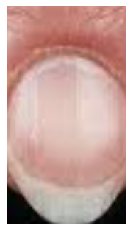

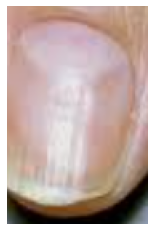

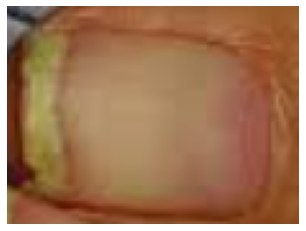

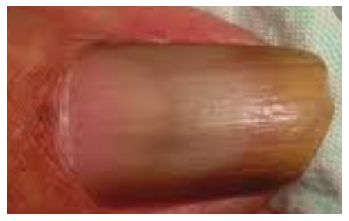

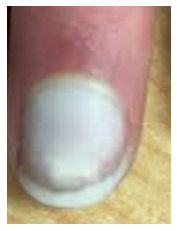

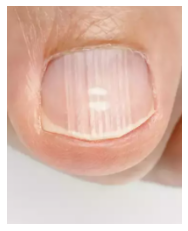

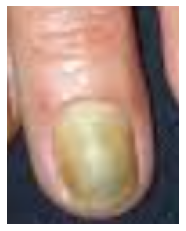

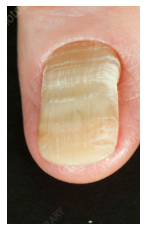

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_pale = [os.path.join(pale_dir, fname) 
                for fname in pale_files[pic_index-2:pic_index]]
next_red = [os.path.join(red_dir, fname) 
                for fname in red_files[pic_index-2:pic_index]]

next_white = [os.path.join(white_dir, fname) 
                for fname in white_files[pic_index-2:pic_index]]
next_yellow = [os.path.join(yellow_dir, fname) 
                for fname in yellow_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_pale+next_red+next_white+next_yellow):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "datas/train/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "datas/validation/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("vegs.h5")


Found 96 images belonging to 4 classes.
Found 22 images belonging to 4 classes.
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 17, 17, 128)       0         
_______________________________________

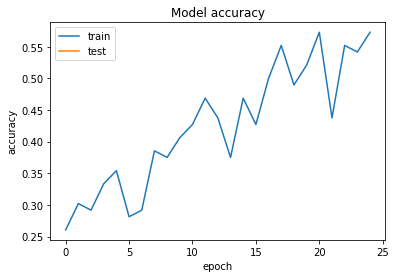

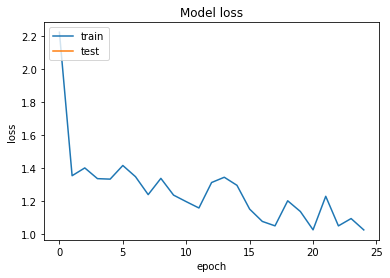

In [ ]:
def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot_train_history(history)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 29.PNG to 29 (1).PNG
Saving 30.PNG to 30.PNG
Saving 31.PNG to 31.PNG
Saving 32.PNG to 32.PNG
Saving 33.PNG to 33.PNG
Saving 34.PNG to 34.PNG
Saving 35.PNG to 35 (1).PNG
29.PNG
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 2.5583267e-16]]
30.PNG
[[1. 0. 0. 0.]]
31.PNG
[[1.000000e+00 0.000000e+00 0.000000e+00 1.510867e-26]]
32.PNG
[[1. 0. 0. 0.]]
33.PNG
[[9.151151e-13 0.000000e+00 1.000000e+00 0.000000e+00]]
34.PNG
[[9.7418064e-01 0.0000000e+00 5.4704575e-08 2.5819408e-02]]
35.PNG
[[1. 0. 0. 0.]]
